# Canadian Bioinformatics Workshops Series

## Plotting Reference

#### Created by *Boris Steipe*

### Contents

1 - Type of Plots  
2 - Colours  
3 - Lines  
4 - Coordinates  
5 - Title, legends etc.  
6 - Plotting Characters  
7 - Drawing on plots  
8 - Plots of X-Y-Z coordinates  
9 - The plot window  
10 - Special packages  

### 1 - Types of Plots

This lists the generic plots only.  Many more specialized plot-types are available.  

plot()  
pie()  
hist()  
stripchart()  
stem()  
barplot()  
boxplot()  

Examples:  

In [1]:
#generate some data
x <- rnorm(200)
y <- x^3 * 0.25 + rnorm(200, 0, 0.75)

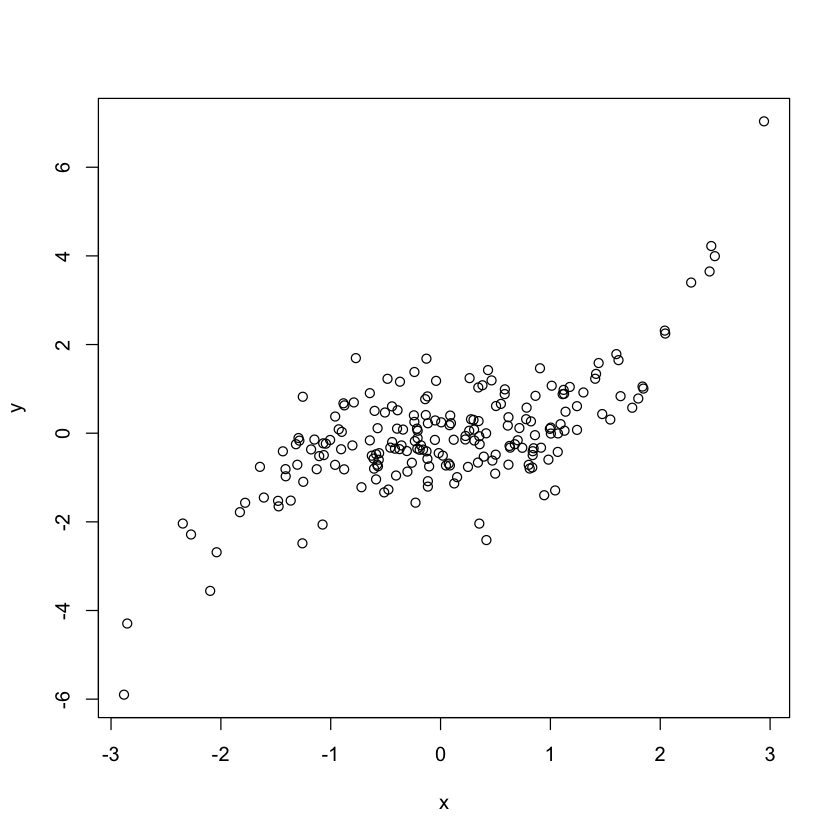

In [2]:
#standard scatterplot
plot(x,y)

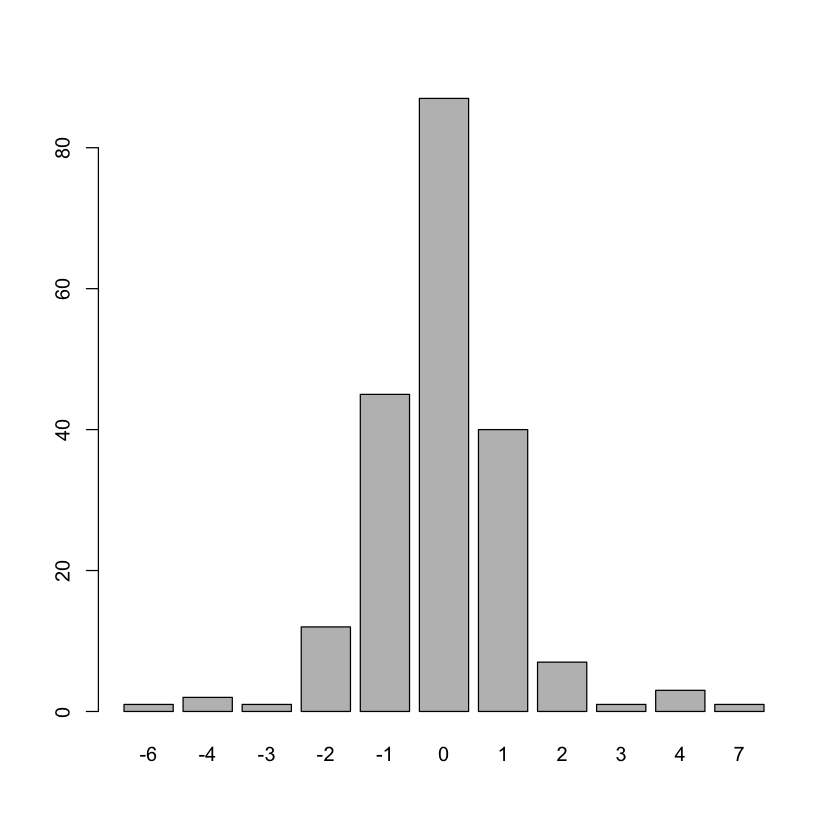

In [3]:
#barplot
barplot(table(round(y)))

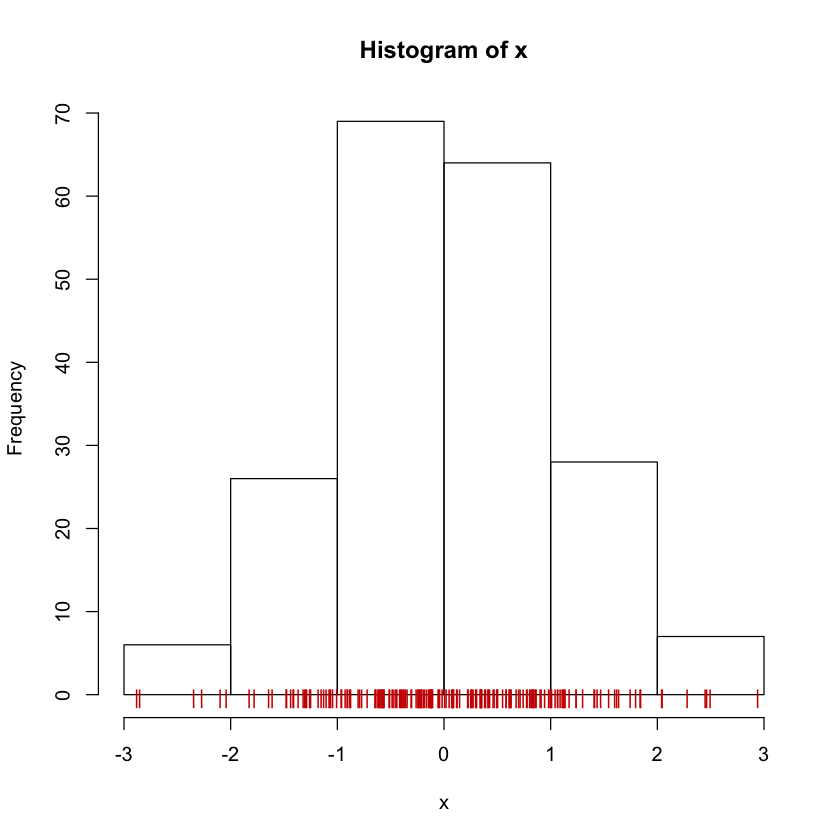

In [6]:
#hist
hist(x, breaks=5)
# add a stripchart() of the actual values
stripchart(x, pch="|", add=TRUE, col="red3", xlim=c(-3, 3), at=-0.5)

In [7]:
#stem()
#A stem-and-leaf plot is like a histogram, but output on the console.
#Useful when you need to send a distribution in the text of an email.
stem(x)


  The decimal point is at the |

  -2 | 99
  -2 | 3310
  -1 | 886655
  -1 | 4444333333321111110000
  -0 | 9999998887666666666666655555
  -0 | 444444444333322222222222211111111111000
   0 | 0001111111222233333333344444444
   0 | 5555556666666777788888888899999
   1 | 000000111111112223444
   1 | 556667888
   2 | 0034
   2 | 559



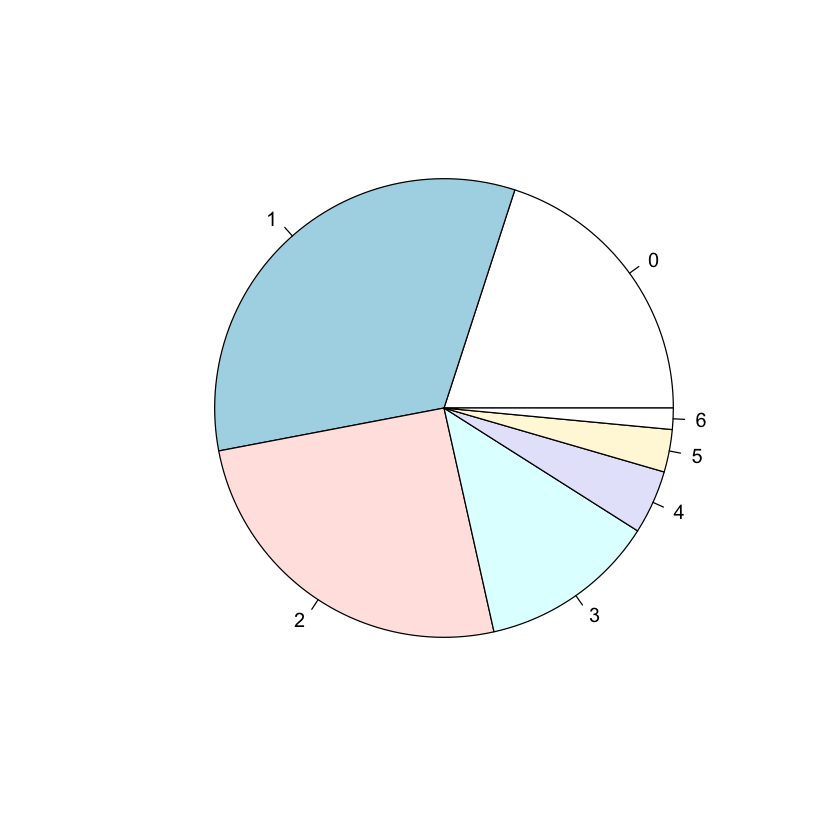

In [8]:
#pie
pie(table(abs(round(x*2))))

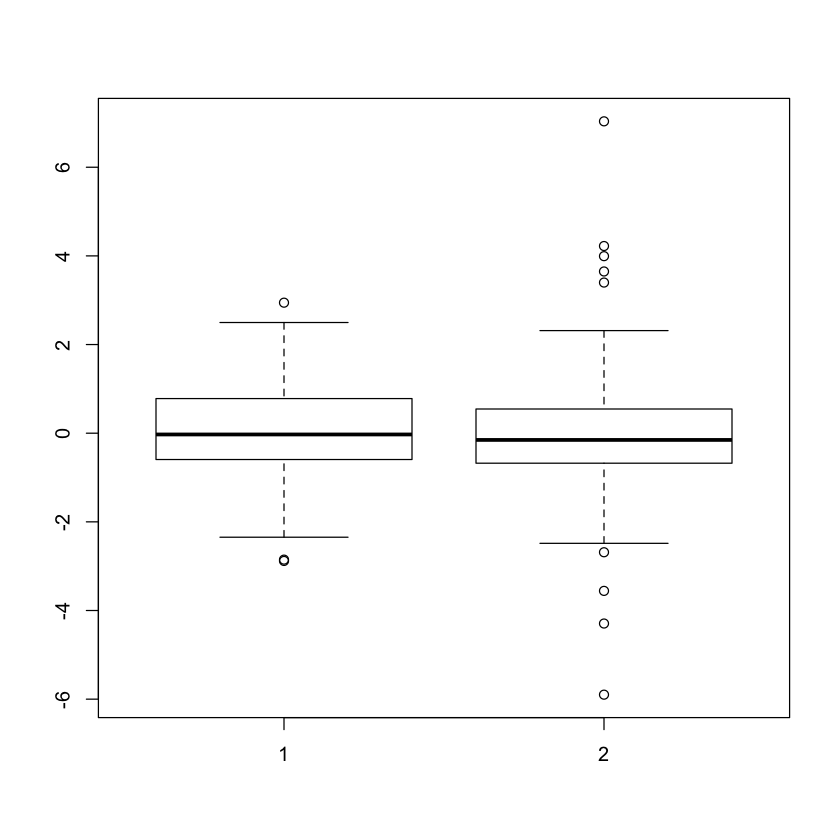

In [9]:
#boxplot
boxplot(x,y)

### 2 - Colours

Colours can be specified by number, by name, as hex-triplets as rgb or hsv values, and through colour palettes.

#### Colours by number
The col=... parameter for plots is 1 by default and you can set it to the range 0:8.  
0: white  
1: black (the default)  
2: red  
3: green  
4: blue  
5: cyan  
6: magenta  
7: yellow  
8: grey  

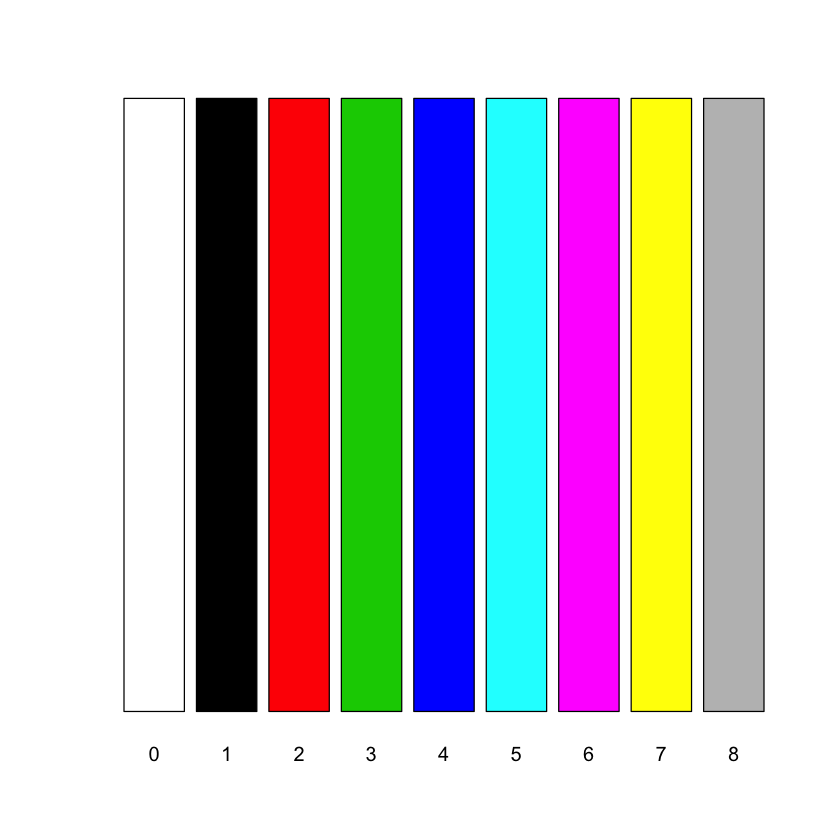

In [10]:
barplot(rep(1,9), col=0:8, axes=FALSE, names.arg=c(0:8))

As you can see, these primary colors are decidedly garish and offend even just a minimal sense of aesthetics.  Fortunately there are much more sophisticated ways to define colors in R.

### Colors by name 

You may have noticed that "red", "green", and "blue" work for the col=... parameter, but you probably would not have imagined that "peachpuff", "firebrick" and "goldenrod" are valid as well. In fact, there are 657 named colors in R. Access them all by typing:
colors()

Read more about named colors (and related topics) at http://research.stowers-institute.org/efg/R/Color/Chart/

### Colors as hex-triplets 

Hex triplets in R work exactly as in HTML: a triplet of RGB values in two-digit hexadecimal representation. Read more e.g. at http://en.wikipedia.org/wiki/Web_colors.  There are many tools on the Web that help to generate pleasing palettes. E.g. http://kuler.adobe.com/.  Here is an example -"Creative Cloud"- taken from the site above.

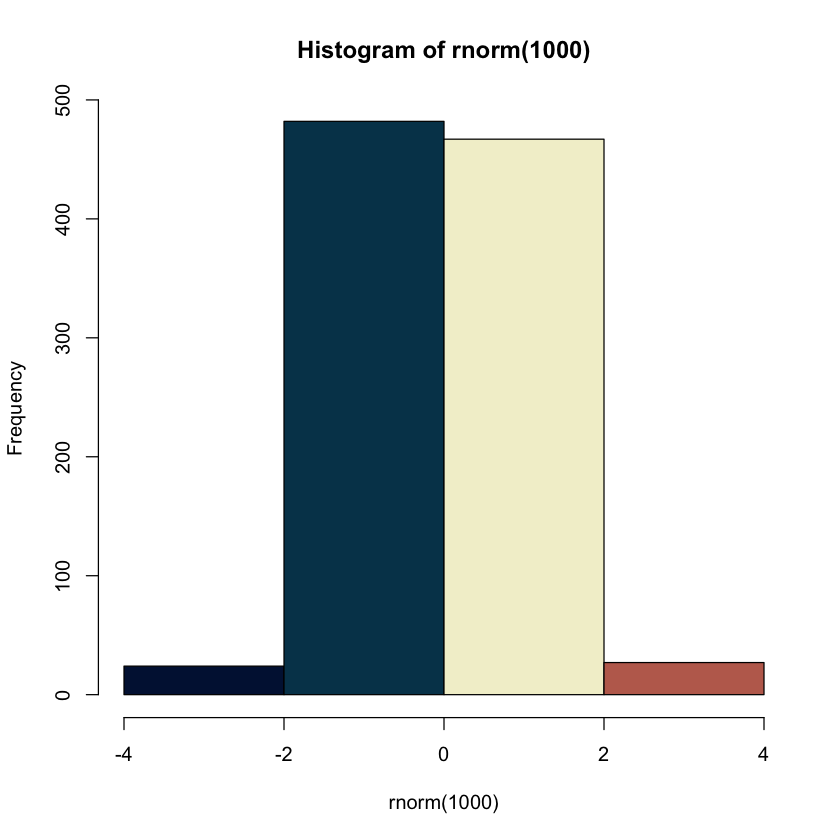

In [11]:
CC <- c("#011640", "#024059", "#F2F0D0", "#BE6C5C", "#8C3037" )
hist(rnorm(1000), breaks=5 , col=CC)

R colours are actually specified as quartets: the fourth value the "Alpha channel" defines the transparency. Setting this to values other than "FF" (the default) can be useful for very crowded plots, or for creating overlays.

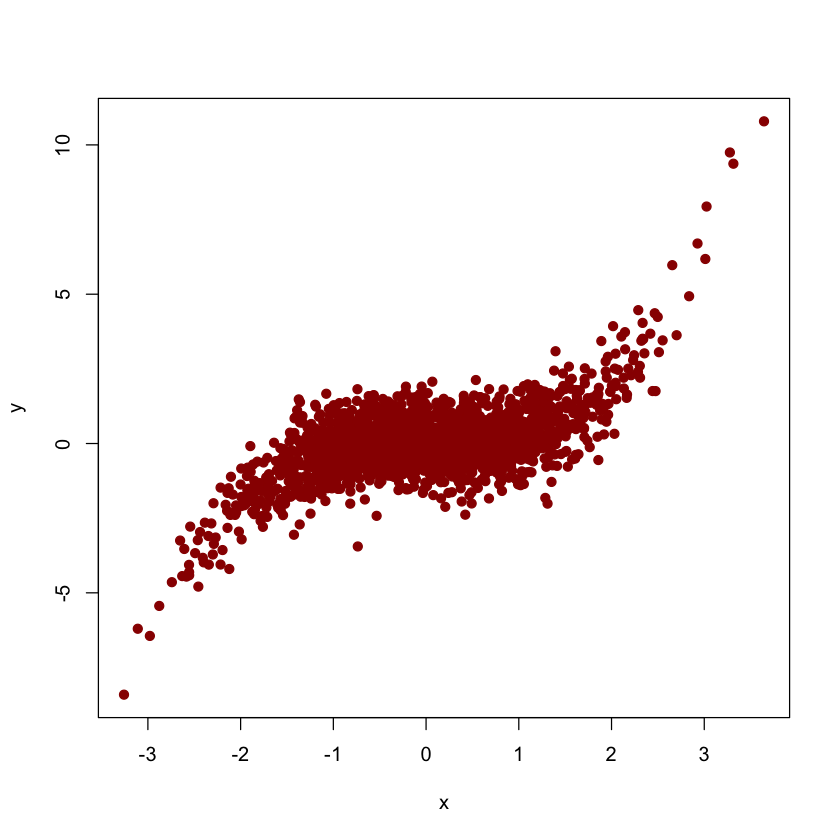

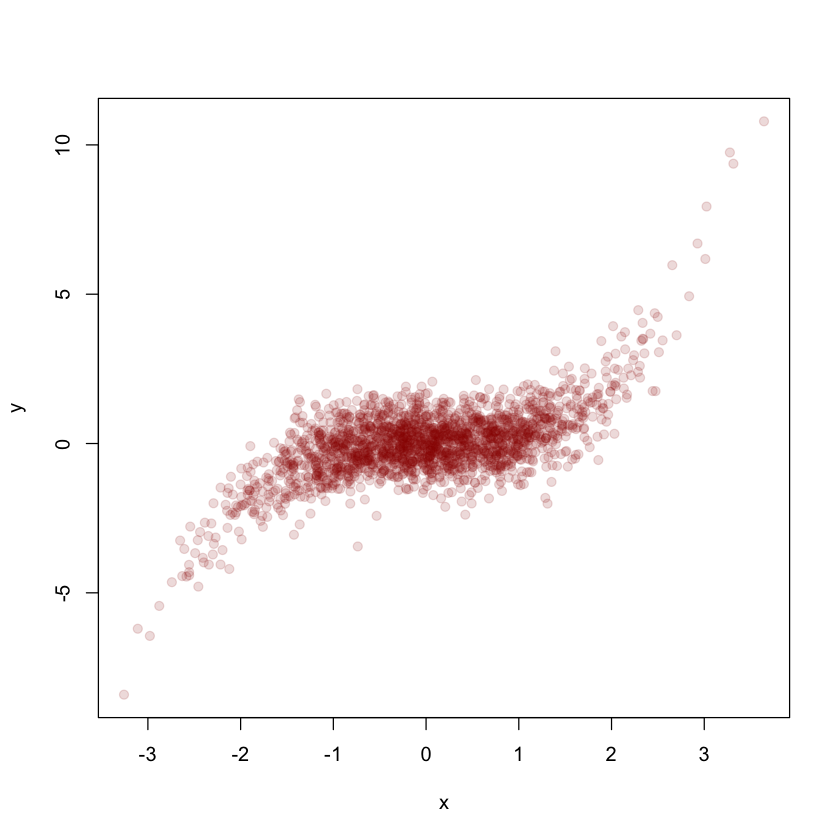

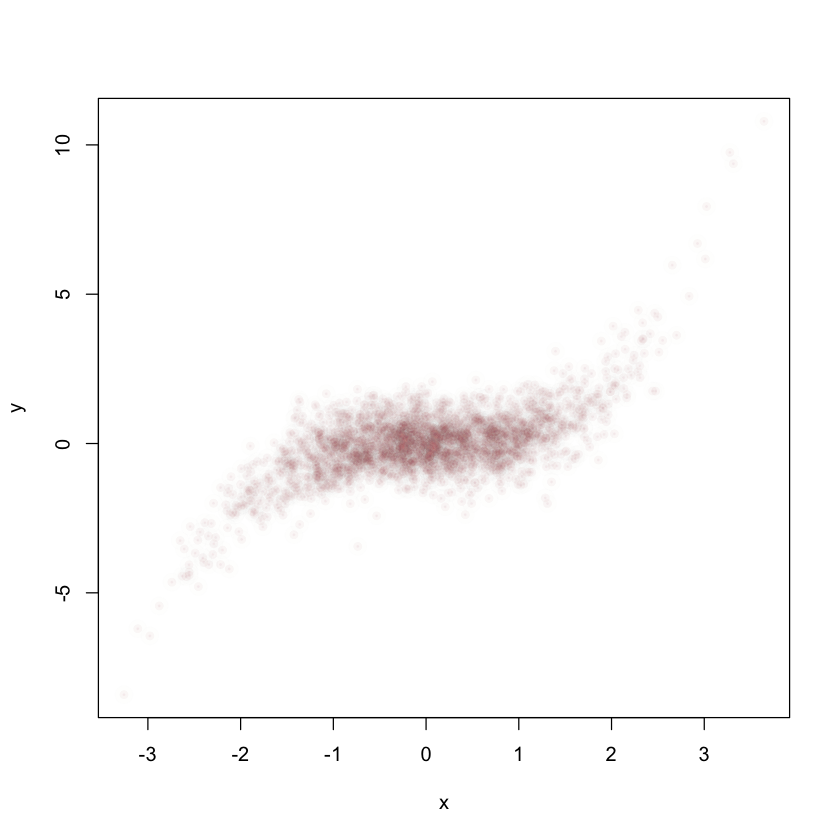

In [12]:
x <- rnorm(2000)
y <- x^3 * 0.25 + rnorm(2000, 0, 0.75)
# compare:
plot(x,y, pch=19, col="#990000")
plot(x,y, pch=19, col="#99000026") # Alpha at ~ 10%
# or with multiple overlays of varying size ...
plot(x,y, pch=16, col="#AA330009")
points(x,y, pch=19, cex=2, col="#88554402")
points(x,y, pch=20, cex=0.3, col="#99004408")

### Color palettes 

R has several inbuilt color palettes, or you can build your own.

#### Inbuilt palettes 

?rainbow

view the palettes

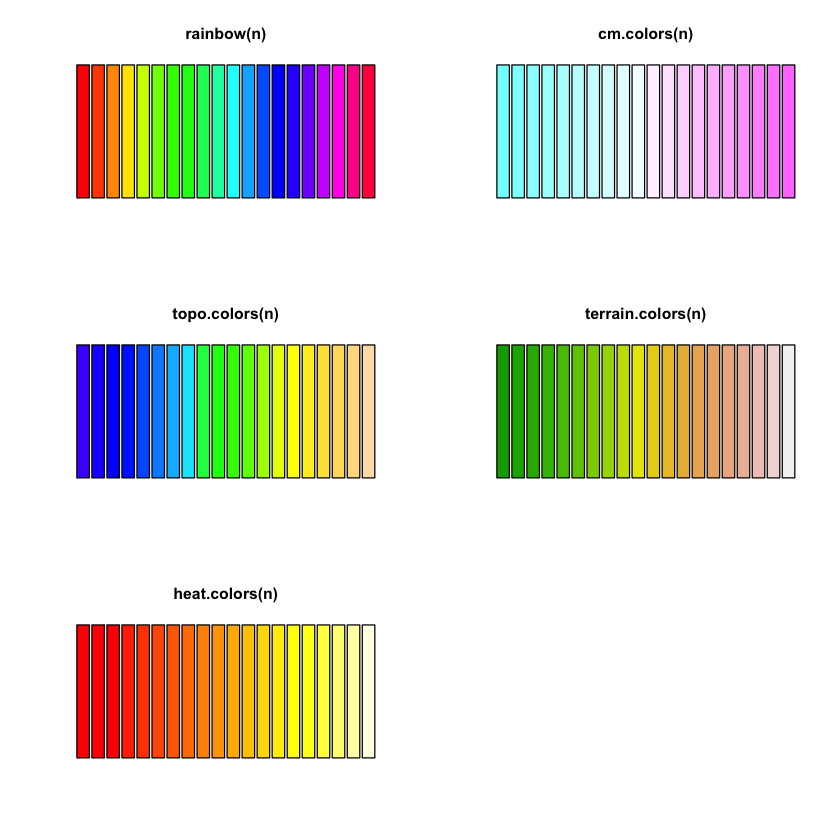

In [13]:
opar <- par(mfrow=c(3,2))
n <- 20
sq <- rep(1, n)
barplot(sq, col=rainbow(n), axes=F, main="rainbow(n)")
barplot(sq, col=cm.colors(n), axes=F, main="cm.colors(n)")
barplot(sq, col=topo.colors(n), axes=F, main="topo.colors(n)")
barplot(sq, col=terrain.colors(n), axes=F, main="terrain.colors(n)")
barplot(sq, col=heat.colors(n), axes=F, main="heat.colors(n)")
par <- opar

Example: We generate random points and calculate a "density" at each point. The we plot each point and color it according to its density. See the section on X-Y-Z plotting re. the inbuilt functions supplied by R for this purpose.

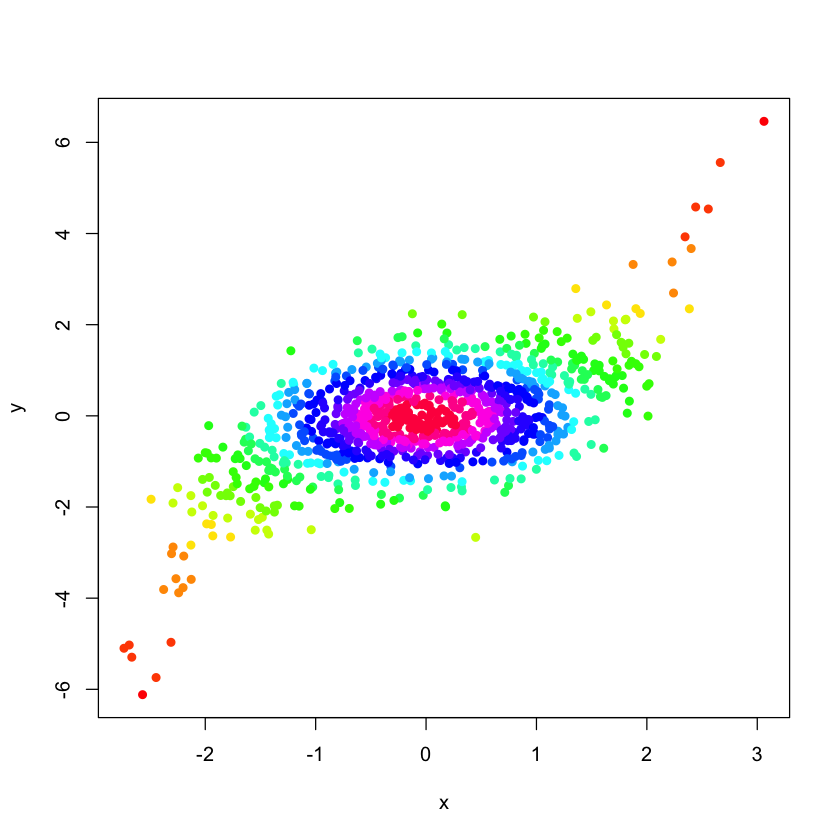

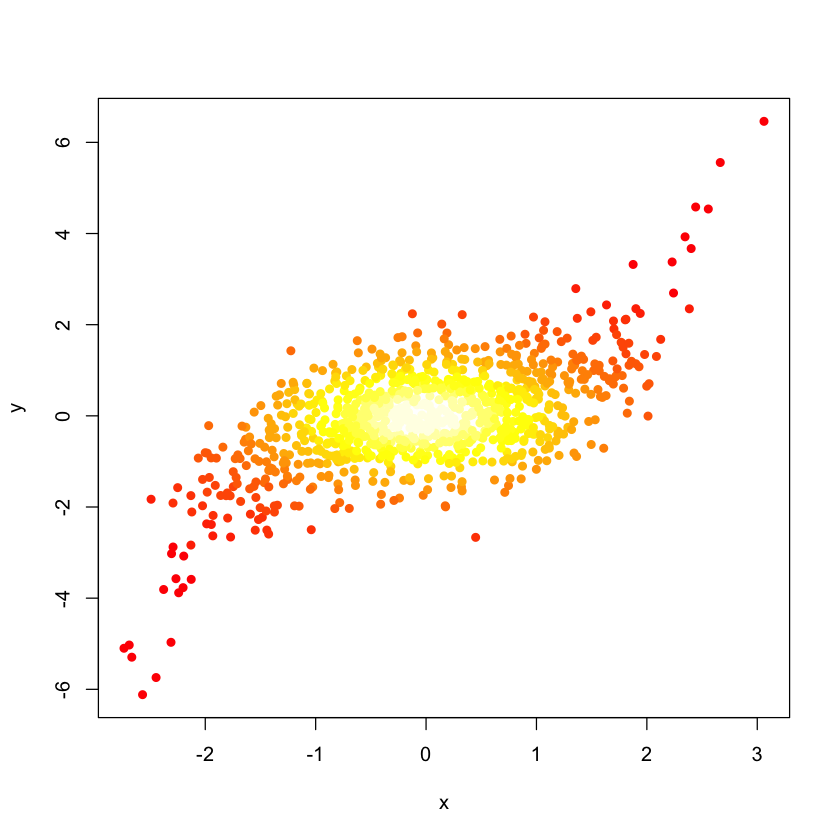

In [14]:
n <- 1000
x <- rnorm(n)
y <- x^3 * 0.25 + rnorm(n, sd=0.75)
z <- rep(0, n) # initialize z
for (i in 1:n) { # calculate a density from the proximity of other points
    dx <- x-x[i]; dx <- dx * dx # square of the distance in x
    dy <- y-y[i]; dy <- dy * dy # square of the distance in y
    d <- dx + dy # square of the sum
    d <- d[-i] # remove the self-element
    z[i] <- 1/sum(d) # let density decay with 1/r^2
}
z <- z/max(z) - 0.00001 # normalize, but keep the max below 1.0
# now map each of the values of z into an interval of the palette
n <- 20 # number of intervals
z <- floor(z * n) + 1 # convert to integers
pal <- rainbow(n) # get a vector of colors from the palette
cz <- pal[z] # apply the color for each density value
plot(x,y, col=cz, pch=16) # plot

# use a different palette
pal <- heat.colors(n); cz <- pal[z]
plot(x,y, col=cz, pch=16)

### Custom palettes 

"Cold" values should really be black, not red. Lets define a custom palette: colorRamPalette() is a function that returns a function. The returned function can be used to calculate a palette, a trajectory along a number of waypoints in colorspace. Try:

function (n) 
{
    x <- ramp(seq.int(0, 1, length.out = n))
    if (ncol(x) == 4L) 
        rgb(x[, 1L], x[, 2L], x[, 3L], x[, 4L], maxColorValue = 255)
    else rgb(x[, 1L], x[, 2L], x[, 3L], maxColorValue = 255)
}
<bytecode: 0x102781bf0>
<environment: 0x1027830e0>

[1] "#000000" "#170000" "#2E0000" "#450000" "#5C0000" "#740000" "#8B0000"
 [8] "#A20000" "#B90000" "#D10000" "#E80000" "#FF0100" "#FF3900" "#FF7100"
[15] "#FFAA00" "#FFE200" "#FFFF23" "#FFFF6C" "#FFFFB5" "#FFFFFF"

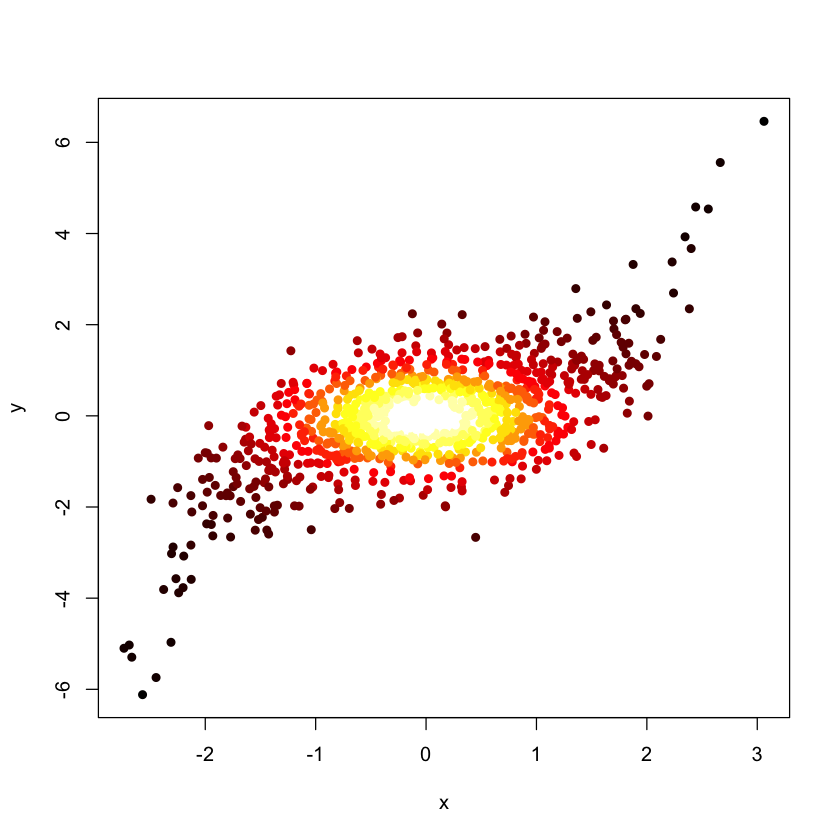

In [15]:
fc <- colorRampPalette(c("black", "red", "yellow", "white"), bias=0.5) # assigns a function to fc
fc # look at the function
fc(n) # use the function to get n values
pal <- fc(n); cz <- pal[z] # assign the colors according to z
plot(x,y, col=cz, pch=16)

### 3 - Lines

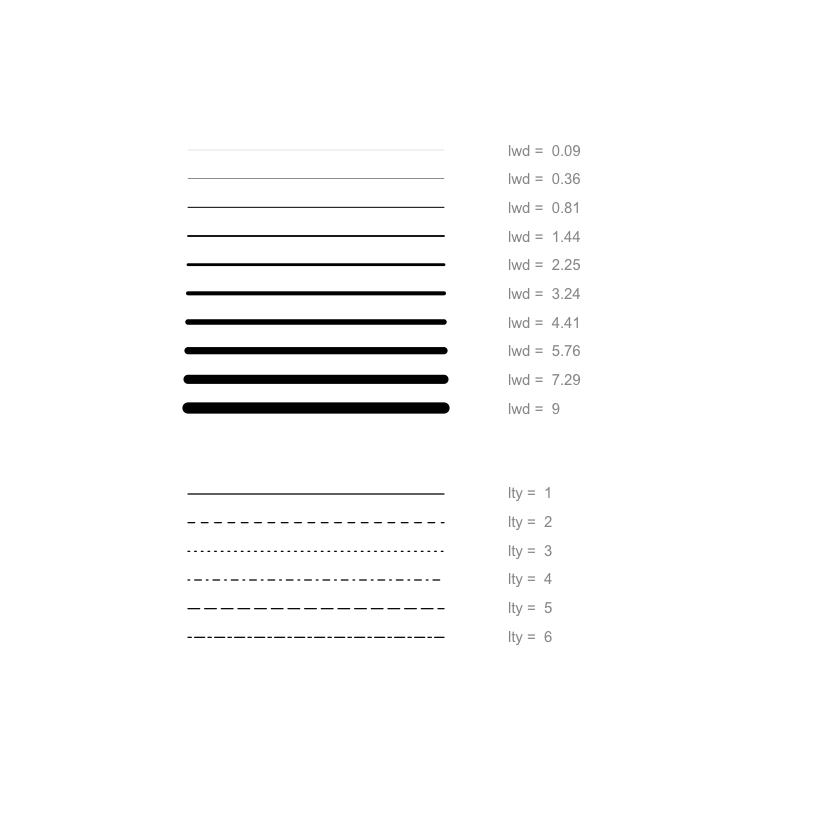

In [16]:
plot(c(0,10), c(0,10), type = "n", axes = FALSE, xlab = "", ylab = "")
# Line width
for (i in 1:10) {
y <- 10-(i/2)
segments(1,y,5,y, lwd=(0.3*i)^2)
text(6, y, paste("lwd = ", (0.3*i)^2), col="grey60", adj=0, cex=0.75)
}
# Line type
for (i in 1:6) {
y <- 4-(i/2)
segments(1,y,5,y, lty=i)
text(6, y, paste("lty = ", i), col="grey60", adj=0, cex=0.75)
}

### 4 - Coordinates

For details, see:  
?plot.default

#### Default

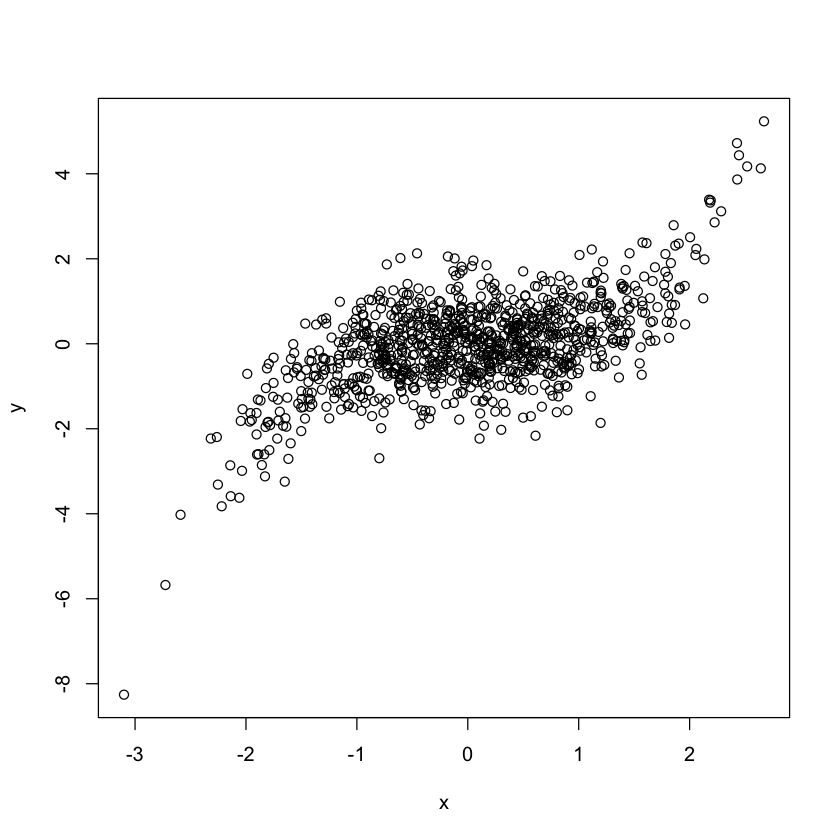

In [17]:
n <- 1000
x <- rnorm(n)
y <- x^3 * 0.25 + rnorm(n, sd=0.75)
plot(x,y) # Default

#### Axes

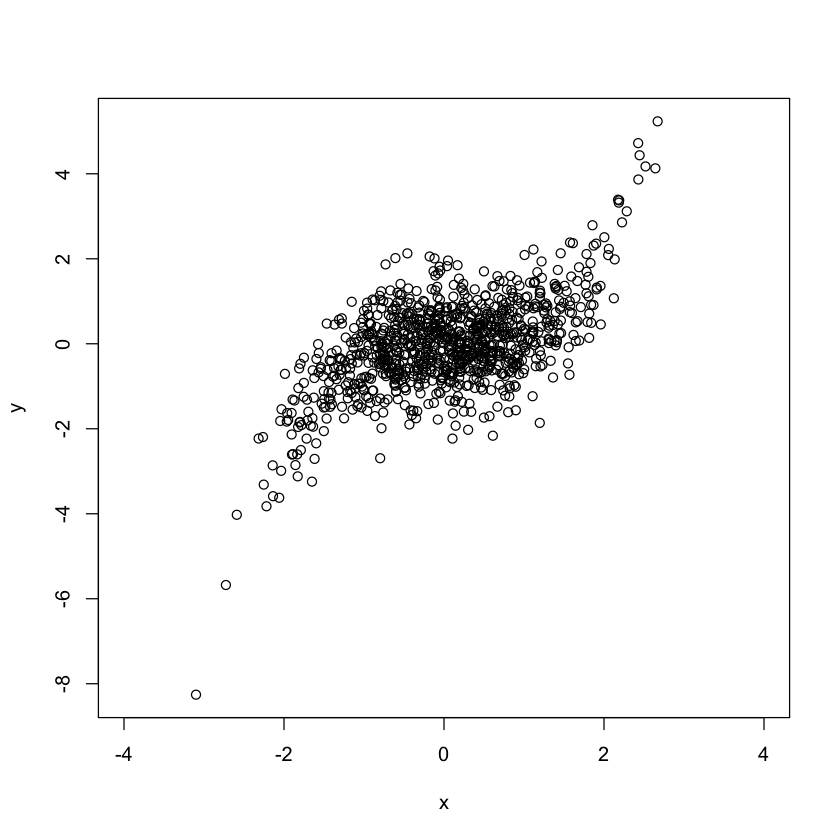

Warning message:
In xy.coords(x, y, xlabel, ylabel, log): 486 x values <= 0 omitted from logarithmic plotWarning message:
In xy.coords(x, y, xlabel, ylabel, log): 503 y values <= 0 omitted from logarithmic plot

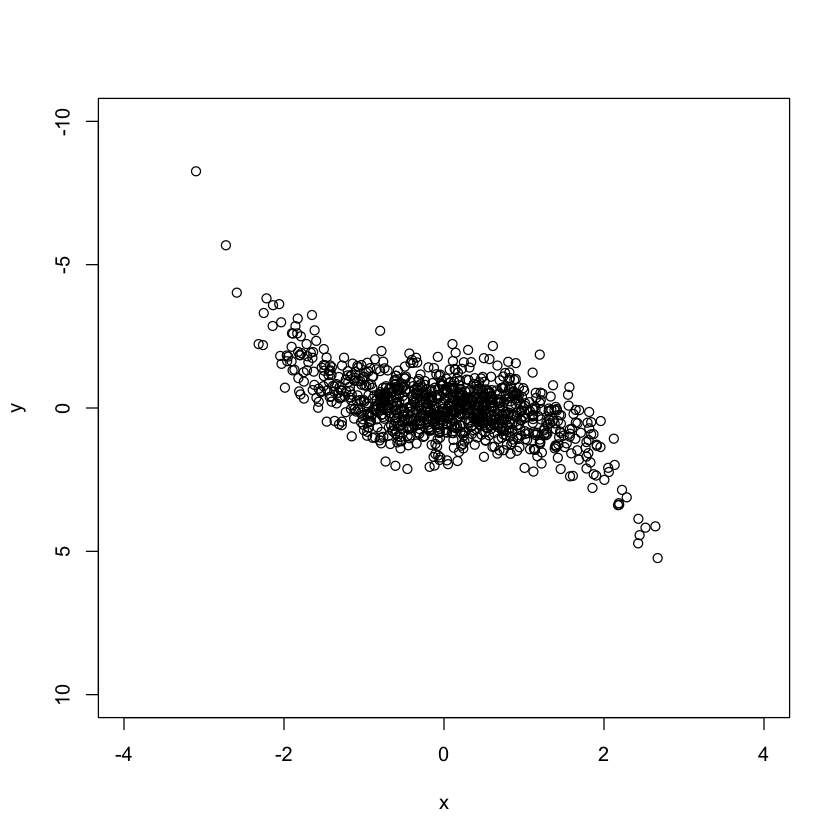

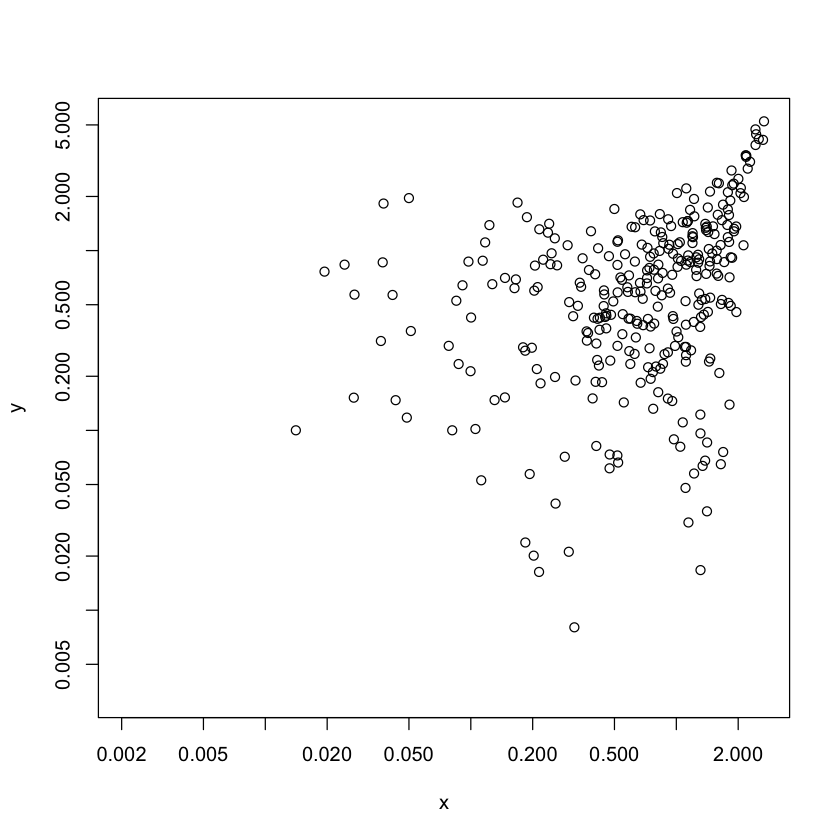

In [18]:
plot(x,y, xlim=c(-4, 4)) # fixed limits
plot(x,y, xlim=c(-4, 4), ylim=c(10, -10)) # reverse is possible
plot(x,y, log="xy")

The axis parameters in the default plot are limited. If you want more control, suppress the printing of an axis in the plot and use the axis() function instead.  
?axis

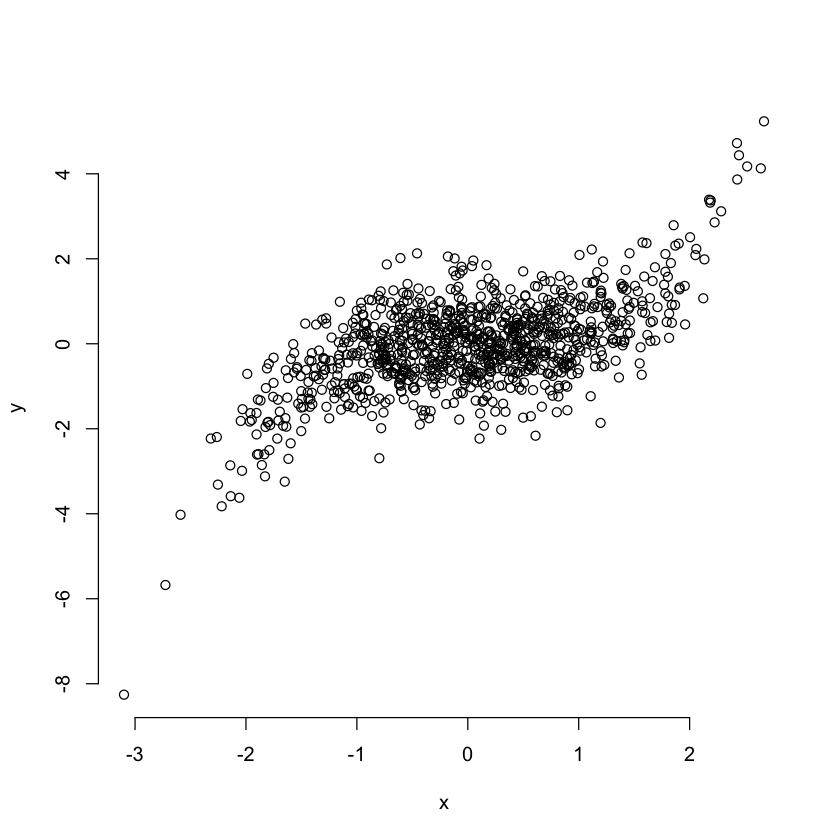

In [19]:
plot(x,y, axes=FALSE)
axis(1)
axis(2)

Specifying:
- the length of the tickmarks (tcl) as a fraction of the height of a line of text: 
    - positive values: inside 
    - negative values: outside the plot area;
- the positions of the tickmarks (at). The axis is only drawn to the end of the plot area, even if a tickmark position is defined beyond it. With this, you can make x and y axes intersect.

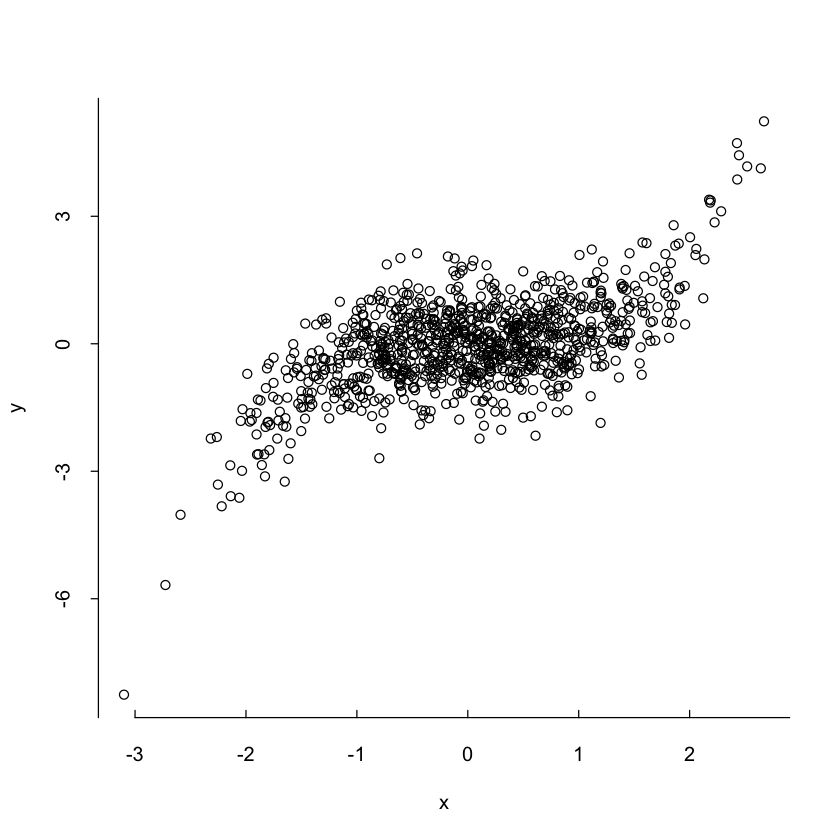

In [20]:
plot(x,y, axes=FALSE)
axis(1, at=-3:3, tcl=0.3)
axis(2, at=seq(-9, 6, 3), tcl=-0.3)

Specifying
- labels: the "labels" vector and the "at" vector must have the same length, even if some tickmarks do not fall inside the plot area and are not shown.
- gridlines: use tck instead of tcl: (ticks as fraction of plot area)

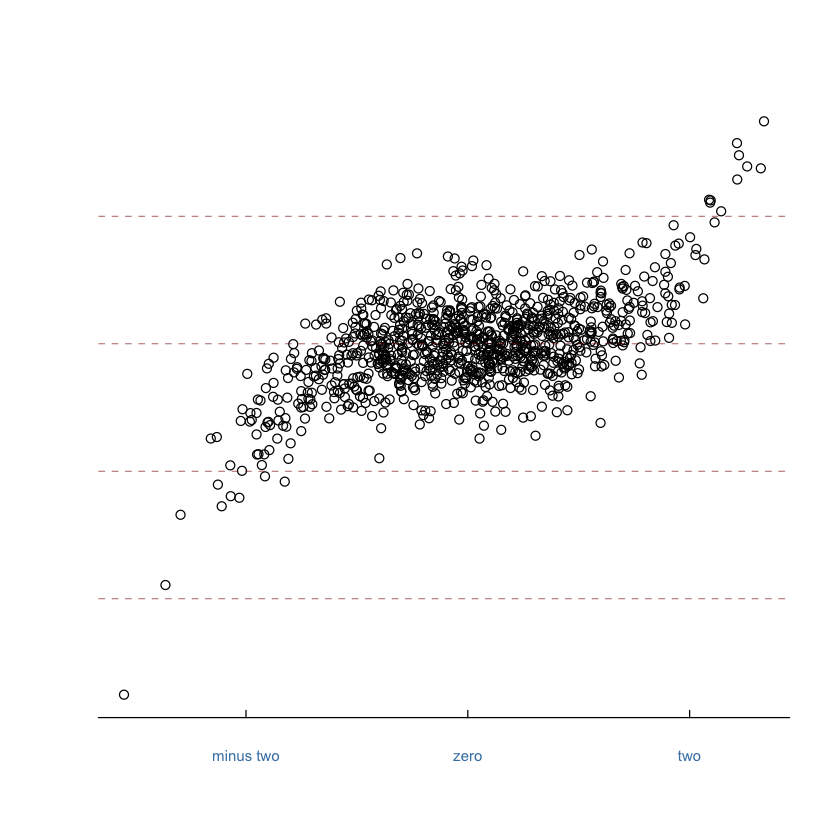

In [21]:
plot(x,y, axes=FALSE, xlab="", ylab="")
axis(1, at=c(-10, -2, 0, 2, 10),
 labels=c("", "minus two", "zero", "two", ""),
 tcl=0.3,
 cex.axis=0.75,
 col.axis="steelblue")
axis(2, at=seq(-6, 6, 3),
 labels=rep("", 5), # supress labels with empty string
 lwd=0, # supress axis line
 tck=1.0, # draw tickmarks full length of plot area
 lwd.ticks=0.5, # line width for ticks
 lty=2, # line type for axis and ticks
 col.ticks="red4" # color for tickmarks
 )

Axis-labels and title are straightforward parameters of plot

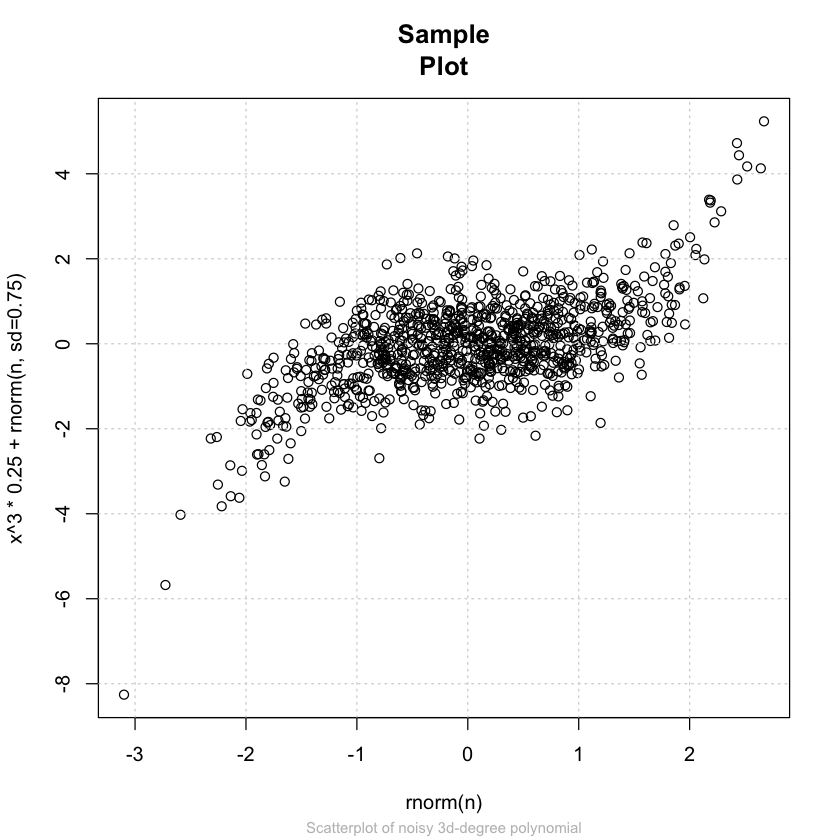

In [22]:
plot(x,y, xlab="rnorm(n)",
 ylab="x^3 * 0.25 + rnorm(n, sd=0.75)",
 cex.main=1.3,
 main="Sample\nPlot",
 cex.sub=0.75,
 col.sub="grey",
 sub="Scatterplot of noisy 3d-degree polynomial"
 )
# Add gridlines
grid()

### 5 - Title, legends, etc.

mtext()  
legend()  
title()  
See also: box()  

### 6 - Plotting Characters

#### pch
id 1:20 are regular symbols

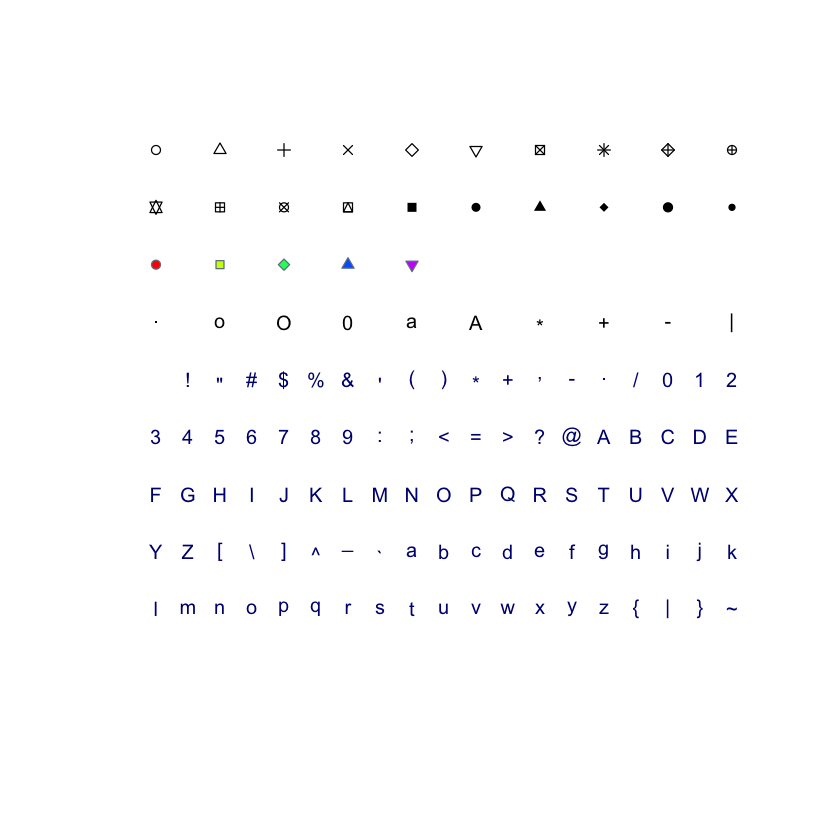

In [28]:
# create coordinates
plot(c(0,10), c(0,10), type = "n", axes = FALSE, xlab = "", ylab = "")
# coordinates for first 25 symbols
x1 <- rep(0.5:9.5, 2)[1:20]
y1 <- sort(rep(9.5:8.5, 10), dec=TRUE)[1:20]
points(x1, y1, pch=1:20)
# id 21:25 can have different border and fill colors
x2 <- 0.5:4.5
y2 <- rep(7.5,5)
points(x2, y2, pch=21:25, col="slategrey", bg=rainbow(5))
# ten extra symbols are defined as characters
x3 <- 0.5:9.5
y3 <- rep(6.5,10)
extra = c(".", "o", "O", "0","a","A", "*", "+","-","|")
points(x3, y3, pch=extra) # note: ext is a character vector
# The ASCII codes for characters 32 to 126 can also be used as plotting characters
x4 <- rep(seq(0.5,9.5,0.5), 5)[1:96]
y4 <- sort(rep(5.5:0.5, 19), dec=TRUE)[1:96]
points(x4, y4, pch=32:126, col="navyblue")

#### Plotting arbitrary text  
use the text() function to plot characters and strings to coordinates  
?text

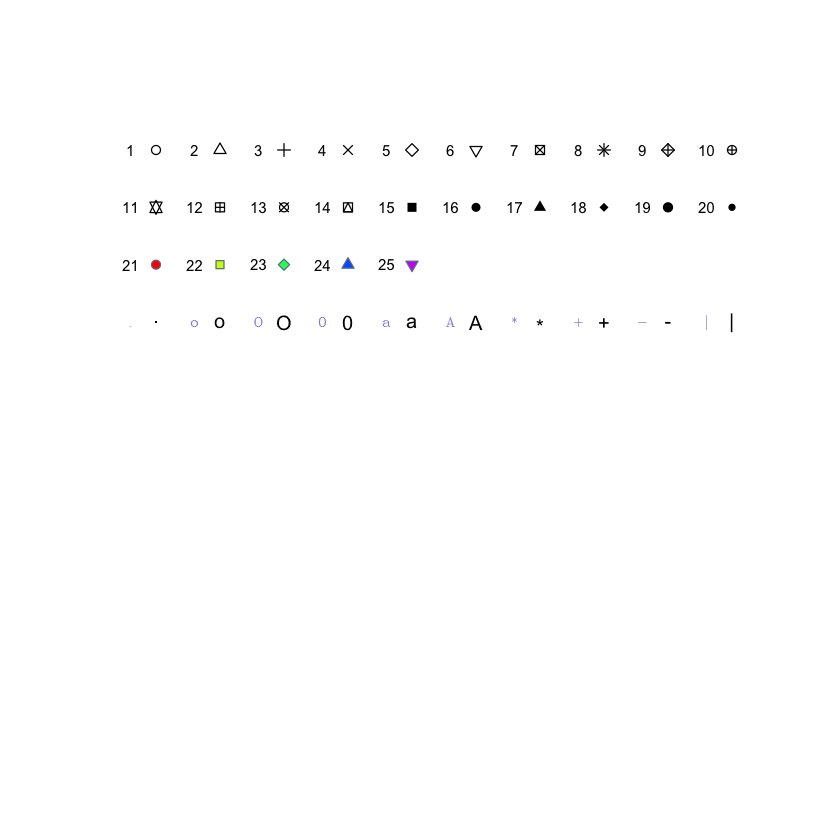

In [30]:
# Example: add labels to the symbols
# create coordinates
plot(c(0,10), c(0,10), type = "n", axes = FALSE, xlab = "", ylab = "")
# coordinates for first 25 symbols
x1 <- rep(0.5:9.5, 2)[1:20]
y1 <- sort(rep(9.5:8.5, 10), dec=TRUE)[1:20]
points(x1, y1, pch=1:20)
# id 21:25 can have different border and fill colors
x2 <- 0.5:4.5
y2 <- rep(7.5,5)
points(x2, y2, pch=21:25, col="slategrey", bg=rainbow(5))
# ten extra symbols are defined as characters
x3 <- 0.5:9.5
y3 <- rep(6.5,10)
extra = c(".", "o", "O", "0","a","A", "*", "+","-","|")
points(x3, y3, pch=extra) # note: ext is a character vector


# first set: plain symbols (1 to 20)
text(x1-0.4, y1, paste(1:20), cex=0.75)
# symbols with separate background (21 to 25)
text(x2-0.4, y2, paste(21:25), cex=0.75)
# third set: special characters
text(x3-0.4, y3, extra, col="slateblue", cex=0.75, vfont=c("serif", "plain")) # change font

A large set of Hershey vector fonts is available which gives access to many more plotting and labeling options via text().  
demo(Hershey)

#### Plotting other symbols:
In the most general way, Unicode characters can be plotted as text.
The code is passed in hexadecimal, long integer, with a negative sign.
Here is a quarter note (Unicode: 266a) using plot():

Warning message:
In plot.xy(xy, type, ...): conversion failure on '♪' in 'mbcsToSbcs': dot substituted for <e2>Warning message:
In plot.xy(xy, type, ...): conversion failure on '♪' in 'mbcsToSbcs': dot substituted for <99>Warning message:
In plot.xy(xy, type, ...): conversion failure on '♪' in 'mbcsToSbcs': dot substituted for <aa>Warning message:
In plot.xy(xy, type, ...): font metrics unknown for Unicode character U+266a

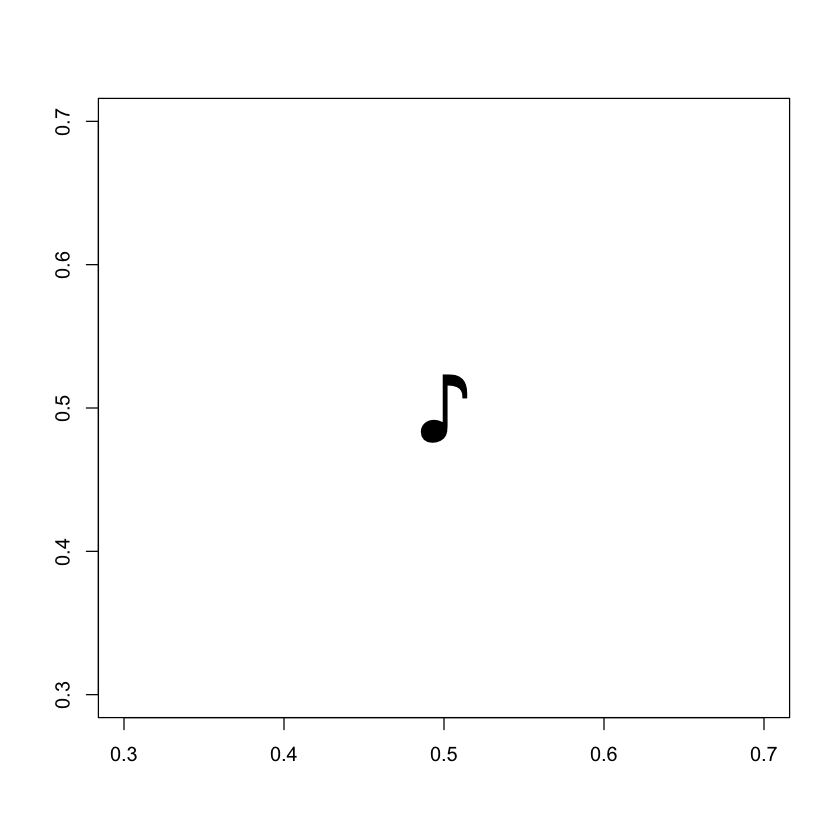

In [31]:
plot(0.5,0.5, pch=-0x266aL, cex=5, xlab="", ylab="")

However, rendering varies across platforms since it depends on unicode support. It is safer to use the inbuilt Hershey vector fonts. 

### 7 - Drawing on plots

points()  
abline()  
segments()  
lines()  
curves()  
rect()  
polygon()  
More: see the Index of functions for the graphics package

### 8 - Plots of X-Y-Z coordinates

?contour

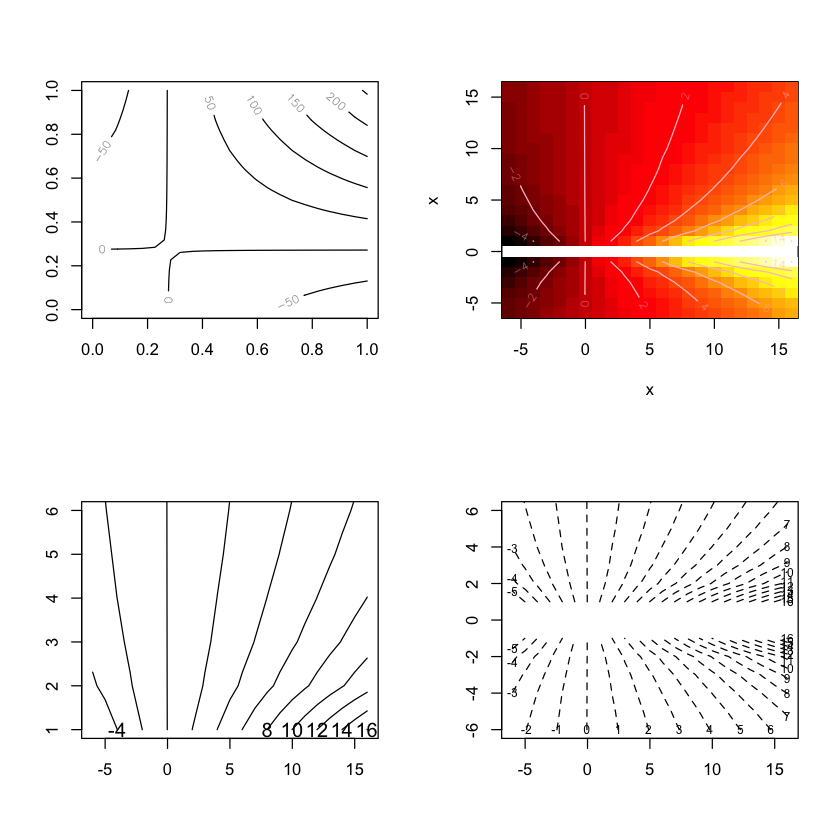

In [32]:
# Example (mostly taken from the help page)
x <- -6:16
op <- par(mfrow = c(2, 2))
contour(outer(x, x), method = "edge", vfont = c("sans serif", "plain"))
z <- outer(x, sqrt(abs(x)), FUN = "/")
image(x, x, z, col=colorRampPalette(c("black", "red", "yellow", "white"))(60))
contour(x, x, z, col = "pink", add = TRUE, method = "edge",
 vfont = c("sans serif", "plain"))
contour(x, x, z, ylim = c(1, 6), method = "simple", labcex = 1)
contour(x, x, z, ylim = c(-6, 6), nlev = 20, lty = 2, method = "simple")
par(op)

In [ ]:
#see also persp()
?persp
demo(persp)

### 9 - The plot window

Most parameters of the plot window can be set via the functions plot(), hist() etc., but some need to be set via the par() function. Calling par() without arguments lists the current sate of the plotting parameters. Calling it with arguments, returns the old parameters and sets new parameters. Thus setting new parameters and saving the old ones can be done in one step. The parameters that have to be set via par include:
- multiple plots in one window (mfrow, mfcol, mfg)
- margin layout (mai, mar mex, oma, omd, omi)
- controlling position and size of a plot in the figure (fig, plt, ps, pty)
- see ?par for details.
See the section on X-Y-Z plots for an example of multiple plots in one window.

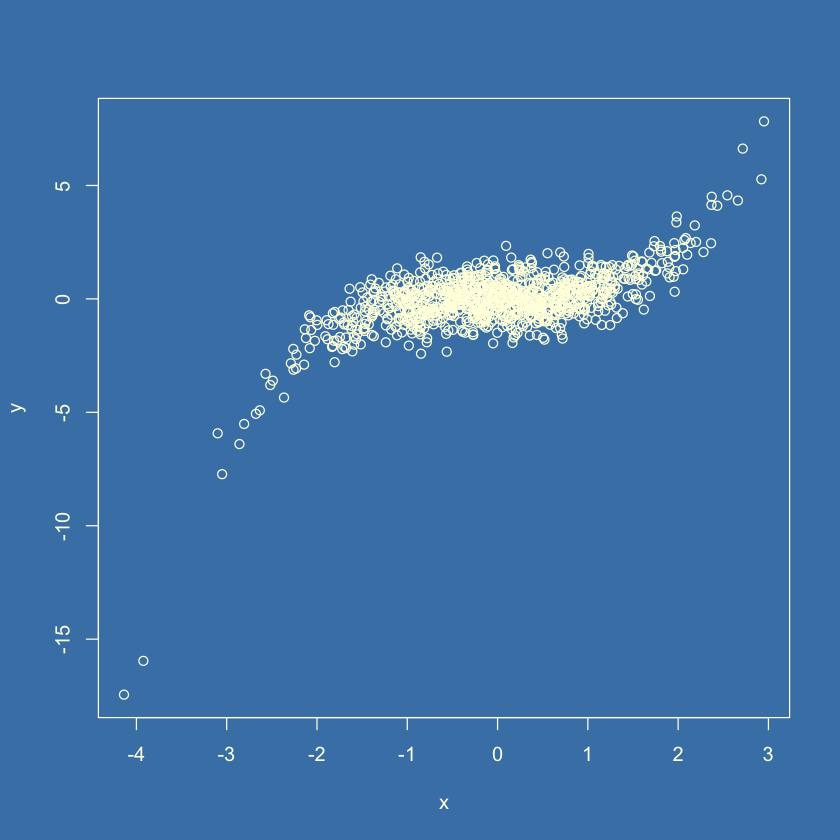

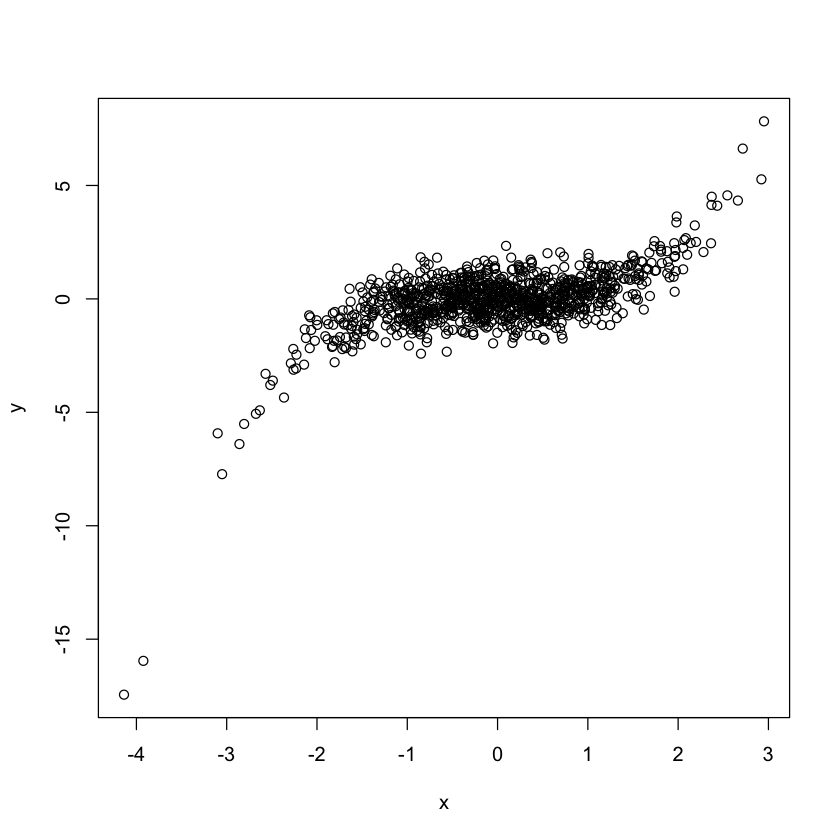

In [33]:
n <- 1000
x <- rnorm(n)
y <- x^3 * 0.25 + rnorm(n, sd=0.75)
# set window background and plotting axes via par
opar <- par(bg="steelblue", fg="lightyellow")
# set axis lables and titles via plot parameters
plot(x,y, col.axis="lightyellow", col.lab="lightyellow")
par(opar)
plot(x,y) # confirm reset

### 10 - Special Packages

In the standard distribution ...  
... use with library("package")  
    graphics  
    grid  
    lattice  

external, from CRAN  
... use with install.packages("package"), then  
    library("package")  
    hexbin  
    ggplot2  

external, from BioConductor  
    prada:  
        source("http://www.bioconductor.org/biocLite.R")  
        biocLite("prada")  

Try:  
n <- 1000  
x <- rnorm(n)  
y <- x^3 * 0.25 + rnorm(n, sd=0.75)  
smoothScatter(x,y, nrpoints=200, pch=20, cex=0.5, col="#6633BB55")  
plot (x, y, col=densCols(x,y), pch=20)  